In [ ]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
os.chdir("/content/sample_data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
combined_csv.to_csv
df = pd.read_csv("combined_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           1815 non-null   object 
 1   Source                         1815 non-null   object 
 2   Site ID                        1815 non-null   int64  
 3   POC                            1815 non-null   int64  
 4   Daily Mean PM10 Concentration  1815 non-null   int64  
 5   UNITS                          1815 non-null   object 
 6   DAILY_AQI_VALUE                1815 non-null   int64  
 7   Site Name                      1815 non-null   object 
 8   DAILY_OBS_COUNT                1815 non-null   int64  
 9   PERCENT_COMPLETE               1815 non-null   float64
 10  AQS_PARAMETER_CODE             1815 non-null   int64  
 11  AQS_PARAMETER_DESC             1815 non-null   object 
 12  CBSA_CODE                      1815 non-null   i

In [ ]:
df.shape

(1815, 20)

In [ ]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date                             0
Source                           0
Site ID                          0
POC                              0
Daily Mean PM10 Concentration    0
UNITS                            0
DAILY_AQI_VALUE                  0
Site Name                        0
DAILY_OBS_COUNT                  0
PERCENT_COMPLETE                 0
AQS_PARAMETER_CODE               0
AQS_PARAMETER_DESC               0
CBSA_CODE                        0
CBSA_NAME                        0
STATE_CODE                       0
STATE                            0
COUNTY_CODE                      0
COUNTY                           0
SITE_LATITUDE                    0
SITE_LONGITUDE                   0
dtype: int64

In [ ]:
print(df.isnull().sum())

Date                             0
Source                           0
Site ID                          0
POC                              0
Daily Mean PM10 Concentration    0
UNITS                            0
DAILY_AQI_VALUE                  0
Site Name                        0
DAILY_OBS_COUNT                  0
PERCENT_COMPLETE                 0
AQS_PARAMETER_CODE               0
AQS_PARAMETER_DESC               0
CBSA_CODE                        0
CBSA_NAME                        0
STATE_CODE                       0
STATE                            0
COUNTY_CODE                      0
COUNTY                           0
SITE_LATITUDE                    0
SITE_LONGITUDE                   0
dtype: int64


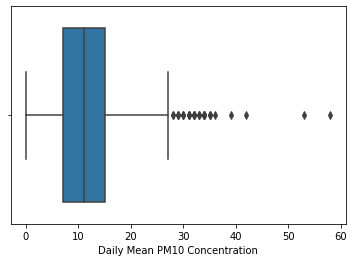

In [ ]:
sns.boxplot(x=df['Daily Mean PM10 Concentration'])

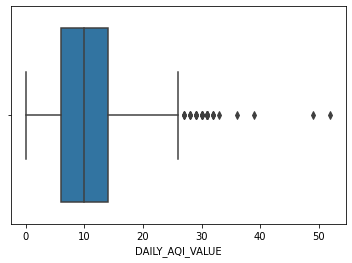

In [ ]:
sns.boxplot(x=df['DAILY_AQI_VALUE'])

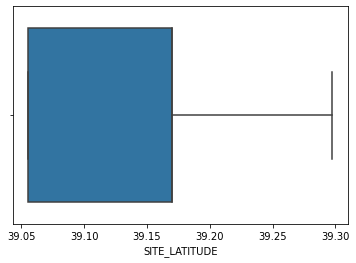

In [ ]:
sns.boxplot(x=df['SITE_LATITUDE'])

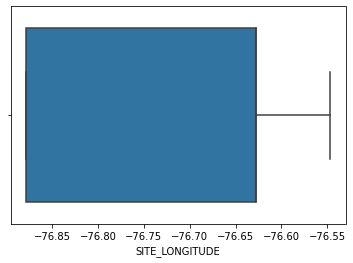

In [ ]:
sns.boxplot(x=df['SITE_LONGITUDE'])

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1810    False
1811    False
1812    False
1813    False
1814    False
Length: 1815, dtype: bool

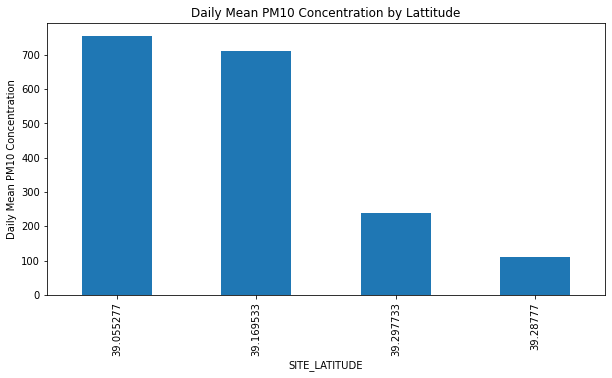

In [ ]:
# Plotting a Histogram
df.SITE_LATITUDE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Daily Mean PM10 Concentration by Lattitude')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xlabel('SITE_LATITUDE');

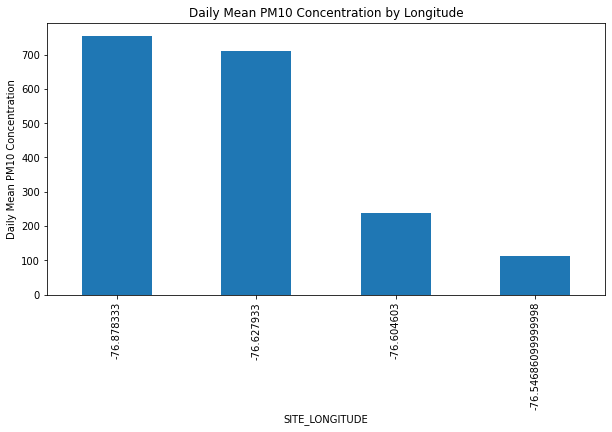

In [ ]:
# Plotting a Histogram
df.SITE_LONGITUDE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Daily Mean PM10 Concentration by Longitude')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xlabel('SITE_LONGITUDE');

**Analyzing**

In [ ]:
corr = df.corr

,Site ID,POC,Daily Mean PM10 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Site ID,1.000000,-0.291958,0.184076,0.186467,NaN,NaN,NaN,-0.347758,NaN,1.000000,0.773937,0.450793
POC,-0.291958,1.000000,0.039412,0.039170,NaN,NaN,NaN,-0.330059,NaN,-0.292058,0.065356,0.277207
Daily Mean PM10 Concentration,0.184076,0.039412,1.000000,0.998674,NaN,NaN,NaN,-0.209837,NaN,0.184043,0.238713,0.229629
DAILY_AQI_VALUE,0.186467,0.039170,0.998674,1.000000,NaN,NaN,NaN,-0.213624,NaN,0.186432,0.242549,0.233545
DAILY_OBS_COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENT_COMPLETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS_PARAMETER_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBSA_CODE,-0.347758,-0.330059,-0.209837,-0.213624,NaN,NaN,NaN,1.000000,NaN,-0.347553,-0.862491,-0.989452
STATE_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNTY_CODE,1.000000,-0.292058,0.184043,0.186432,NaN,NaN,NaN,-0.347553,NaN,1.000000,0.773799,0.450600


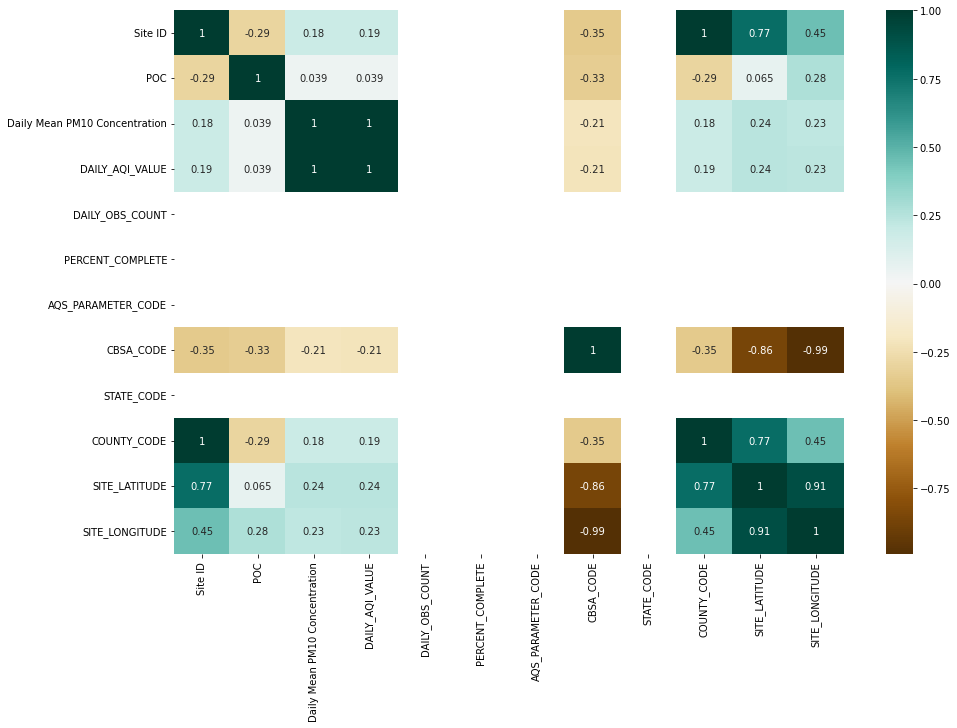

In [ ]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

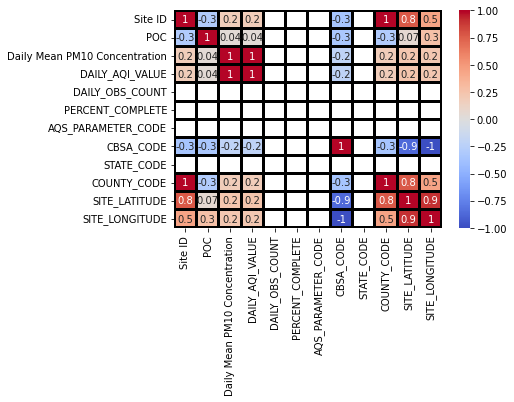

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

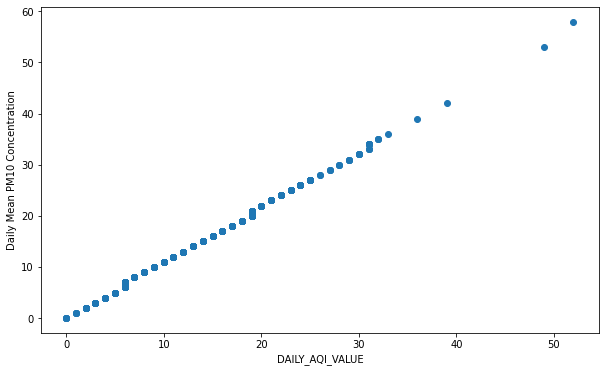

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['DAILY_AQI_VALUE'], df['Daily Mean PM10 Concentration'])
ax.set_xlabel('DAILY_AQI_VALUE')
ax.set_ylabel('Daily Mean PM10 Concentration')
plt.show()